In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")
titanic_data = sns.load_dataset('titanic')
titanic_data.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [2]:
# fitering
titanic_data = titanic_data[["survived", "pclass", "age", "fare"]]
titanic_data.head()

survived  pclass   age     fare
0         0       3  22.0   7.2500
1         1       1  38.0  71.2833
2         1       3  26.0   7.9250
3         1       1  35.0  53.1000
4         0       3  35.0   8.0500

In [3]:
# checking for missing value will return boolean True of false
titanic_data.isnull()

survived  pclass    age   fare
0       False   False  False  False
1       False   False  False  False
2       False   False  False  False
3       False   False  False  False
4       False   False  False  False
..        ...     ...    ...    ...
886     False   False  False  False
887     False   False  False  False
888     False   False   True  False
889     False   False  False  False
890     False   False  False  False

[891 rows x 4 columns]

In [4]:
# checking for missing values using isnull() with mean() will return interesting mean of the data
titanic_data.isnull().mean()

survived    0.000000
pclass      0.000000
age         0.198653
fare        0.000000
dtype: float64

In [6]:
median = titanic_data.age.median()
print(median)

28.0


In [7]:
mean = titanic_data.age.mean()
print(mean)

29.69911764705882


In [8]:
#adding new columns to our dataframe titanic_data and replacing missing values with median or mean

import numpy as np
titanic_data['Median_Age'] = titanic_data.age.fillna(median)
titanic_data['Mean_Age'] = titanic_data.age.fillna(mean)
titanic_data['Mean_Age'] = np.round(titanic_data['Mean_Age'], 1) # check the meaning of the 1(roundin up to 1)
titanic_data.head(20)

survived  pclass   age     fare  Median_Age  Mean_Age
0          0       3  22.0   7.2500        22.0      22.0
1          1       1  38.0  71.2833        38.0      38.0
2          1       3  26.0   7.9250        26.0      26.0
3          1       1  35.0  53.1000        35.0      35.0
4          0       3  35.0   8.0500        35.0      35.0
5          0       3   NaN   8.4583        28.0      29.7
6          0       1  54.0  51.8625        54.0      54.0
7          0       3   2.0  21.0750         2.0       2.0
8          1       3  27.0  11.1333        27.0      27.0
9          1       2  14.0  30.0708        14.0      14.0
10         1       3   4.0  16.7000         4.0       4.0
11         1       1  58.0  26.5500        58.0      58.0
12         0       3  20.0   8.0500        20.0      20.0
13         0       3  39.0  31.2750        39.0      39.0
14         0       3  14.0   7.8542        14.0      14.0
15         1       2  55.0  16.0000        55.0      55.0
16         0       3   2.0  29.1250         2.0       2.0
17         1       2   NaN  13.0000        28.0      29.7
18         0       3  31.0  18.0000        31.0      31.0
19         1       3   NaN   7.2250        28.0      29.7

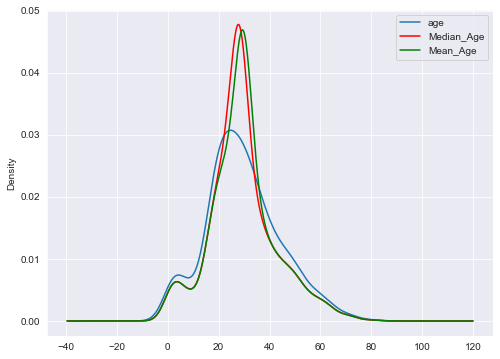

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
titanic_data['age'] .plot(kind='kde', ax=ax)
titanic_data['Median_Age'] .plot(kind='kde', ax=ax, color='red')
titanic_data['Mean_Age'] .plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')